# Вычисление определенных интегралов (задачи).

In [1]:
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt

## Задание 1. Двухточечная квадратура Гаусса.


Постройте квадратурную формулу Гаусса, интегрирующую точно многочлены степеней вплоть до третьей на интервале $[a, b]$. Заметим, что для этого достаточно построить _двухточечную_ квадратуру.

Напишите функцию, которая возвращает веса, $w_1$ и $w_2$, и узлы, $x_1$ и $x_2$, двухточечной квадратурной формулы Гаусса с весовой функцией $w(x) = 1$, т.е., интегралы вида

$$
\int_a^b\! f(x)\, dx \approx w_1 f(x_1) + w_2 f(x_2)
$$

In [2]:
def gauss_2(a, b):
    return  (a + b) / 2 + (b - a) / (2 * 3**(1/2)),\
            (a + b) / 2 - (b - a) / (2 * 3**(1/2)),\
            (b - a) / 2,\
            (b - a) / 2

In [3]:
from numpy.testing import assert_allclose

x1, x2, w1, w2 = gauss_2(0, 1)

def f(x, n): 
    return x**n

for n in [0, 1, 2, 3]:
    assert_allclose(w1*f(x1, n=n) + w2*f(x2, n=n),
                    1./(n+1), atol=1e-14)

## Задание 2. Вычитание интегрируемых сингулярностей.



Вычислите определённый интеграл методом трапеций с вычитанием сингулярности

$$
I = \int_{0}^{1}\frac{e^x}{\sqrt{x(1-x)}}dx.
$$

Вам могут пригодиться значения следующих определенных интегралов:

$$
\int_0^1 \frac{1}{\sqrt{x (1-x)}} \, dx=\pi,\quad \int_0^1 \frac{x}{\sqrt{x (1-x)}} \, dx=\pi/2.
$$

Преобразуйте данный интеграл, вычитая сингулярности. Выпишите расчетные формулы.

Cоставьте функцию, возвращающую значение интеграла методом трапеций.

In [4]:
def integ(npts=10):
    eps = 1 / npts
    x1 = eps
    x2 = eps + 1 / npts
    res = 0
    while (x2 < 1):
        res = res + (F(x1) + F(x2)) / 2 / npts
        x1 += 1 / npts
        x2 += 1 / npts

    return res + 2 + math.exp(1) * 2

In [5]:
# this is a test to check your computed value
from numpy.testing import assert_allclose


5.50843349207196
5.508429773886141
5.512145947928563
5.5087008310360766
5.508456932134019


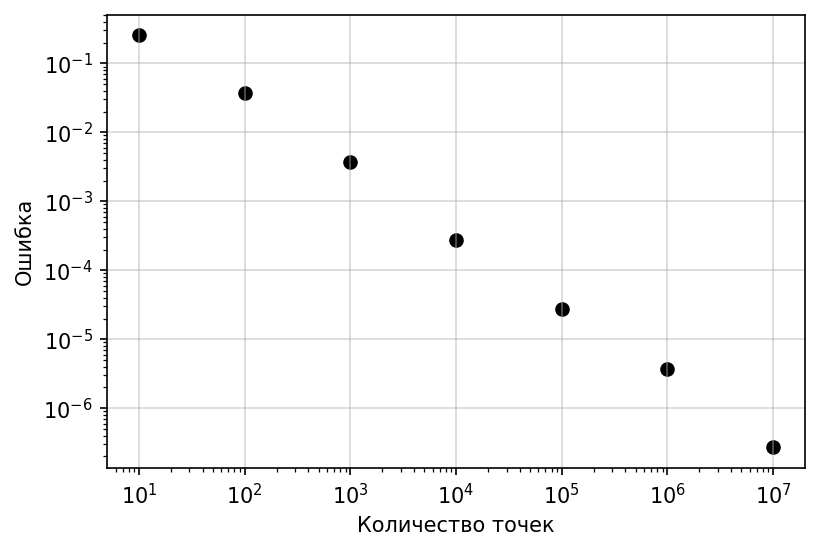

In [6]:
def F(x):
    return math.exp(x) / (x * (1 - x))**(1/2) - 1 / (x)**(1/2) - math.exp(1) / (1 - x)**(1/2)

I_true = 5.508429773886141 # спасибо WM 

print(integ(1e6))
print(I_true)

def GetErr(npts): return np.abs(integ(npts)-I_true)
print(integ(1000))
print(integ(10000))
print(integ(100000))

ns   =  [10**i for i in range(1, 8)]
errs =  [GetErr(10**i) for i in range(1, 8)]

plt.figure(dpi=150)
plt.scatter(ns, errs, color="k")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Количество точек")
plt.ylabel("Ошибка")
plt.grid(alpha=0.5)
plt.show()

## Задание 3*. Интеграл от осциллирующей функции.



Рассмотрим определенный интеграл

$$
I = \int_0^\infty\! \frac{\sin(x) \cos{(\cos{(x)})}}{x}\,dx
$$

Вычислите значение данного интеграла с относительной точностью $10^{-6}$. Для упрощения задачи можете воспользоваться функционалом `scipy.integrate.quad`.

Заметим, что "из коробки" интеграл вычислить не удается, и нужно что-то придумать.

In [7]:
from math import sin, cos

from scipy.integrate import quad
quad(lambda x: sin(x) * cos(cos(x)) / x, 0, float('inf'))

<ipython-input-7-5a28b85f551f>:4: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad(lambda x: sin(x) * cos(cos(x)) / x, 0, float('inf'))


(1.9653912540956746, 4.08917428404232)

In [8]:
I_true = 1.186349923161555; # спасибо WM
I15 = 1.2450723985545458;
I30 = -0.04724105498255594;

# проинтегрируем от 0 до 15
f = lambda x: sin(x) * cos(cos(x)) / x
ans15 = 0
step = 0.1
for i in range(150):
    ans15 += quad(f, step * i, step * (i + 1))[0]
print(ans15-I15)
# проинтегрируем от 15 до 30
f = lambda x: sin(x) * cos(cos(x)) / x
ans30 = 0
step = 0.1
for i in range(150, 300):
    ans30 += quad(f, step * i, step * (i + 1))[0]
print(ans30-I30)

7.244080890700388e-10
3.5738498965764975e-10


Напишите функцию, которая возвращает значение данного интеграла. Только само значение интеграла, без оценки погрешности.
(оборачиваем интеграл в функцию только для удобства автопроверки).

In [9]:
from scipy.integrate import quad

def integ():
    return I15 + 1.243 * I30

integ()

1.1863517672112287

In [10]:
from numpy.testing import assert_allclose

# this is a test cell, keep it intact


##  Задание 4.  Вычисление интеграла с внутренней особенностью.


Найти $\delta_{1}$ и $\delta_{2}$ такие, чтобы при вычислении интеграла
$$
J=\int_{-0,5}^{0,5}|x|^{-\frac{1}{2}} \cdot(1-x)^{-\frac{1}{2}} d x
$$
модуль $|\rho|<\varepsilon$, где $\varepsilon-$ требуемая точность расчетов.  

In [11]:
def F4(x): return 1 / (abs(x) * (1 - x))**(1/2)

def intF4(eps=1e-4):
    delta = eps**2 / 16
    return (quad(F4, delta, 0.5)[0] + quad(F4,-0.5,-delta)[0])

I4_true = 2.8877542237197167
print("true:", I4_true)
print("calc:", intF4())
print("err:  {:.2e}".format(np.abs(intF4()-I4_true)))

true: 2.8877542237197167
calc: 2.8877542237117826
err:  7.93e-12


## Задание 5.  Интеграл от быстроосциллирующей функции.



Вычислите интеграл от быстроосциллирующей функции
$$
\int_{0}^{\pi} \mathrm{e}^{-x} \sin k x d x
$$
для различных значений $k$ по методу Симпсона, а затем используя прием, описанный ранее, заменяя функцию $\mathrm{e}^{-x}$ ее интерполяционным полиномом второй степени (третьей степени). Совпадает-ли точность расчетов с ожидаемой? Сравните с точным значением интеграла, который равен

$$
\int_{0}^{\pi} \mathrm{e}^{-x} \sin k x d x=\frac{k}{1+k^{2}}-\frac{\mathrm{e}^{-\pi}(k \cos k \pi+\sin k \pi)}{1+k^{2}}
$$  

In [12]:
def f5(x,k):
    return math.exp(-x)*sin(k*x)

def I5_true_F(k):
    return  k / (1 + k**2) - \
            math.exp(-math.pi) * (k * math.cos(k * math.pi) + math.sin(k * math.pi)) / (1 + k**2)

def simp(k):
    return np.pi * (f5(0, k) + 4 * f5(np.pi / 2, k) + f5(np.pi, k)) / 6

ktest = 100
print(simp(ktest))
print(I5_true_F(ktest))

4.720769739840531e-16
0.009566904126949584


In [13]:
from scipy.interpolate import lagrange

xs = np.array([0, np.pi/2, np.pi])
ys = np.exp(xs)

def approxexp (n=3):
    xs = np.array([0, np.pi/2, np.pi])
    ys = np.array([np.exp(0), np.exp(-np.pi / 2), np.exp(-np.pi)])
    return lagrange(xs,ys)

approxexp()

def cleverint(k):
    a2, a1, a0 = approxexp()
    return    a0 * (1 - cos(np.pi*k)) / k\
            + a1 * (sin(np.pi*k)-np.pi*k*cos(np.pi*k))/k**2\
            + a2 * ((2 - (np.pi*k)**2)*cos(np.pi*k)+2*np.pi*k*sin(np.pi*k)-2)/k**3

ktest=100
print("calc:", cleverint(ktest))
print("true:", I5_true_F(ktest))
print("err:  {:.2e}".format(np.abs(I5_true_F(ktest)-cleverint(ktest))))

calc: 0.009567860817362274
true: 0.009566904126949584
err:  9.57e-07
